# Q1

In [11]:
#Loading dataset
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer



In [4]:
data = load_breast_cancer()
X = data.data
y = data.target 

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
#Model the outcome as a bernoulli random variable and use a logit link function
with pm.Model() as logistic_model:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=X_train.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    logits = intercept + pm.math.dot(X_train, betas)
    y_obs = pm.Bernoulli("y_obs", logit_p=logits, observed=y_train)
    trace = pm.sample(2000, tune=1000, cores=2, return_inferencedata=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 67 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


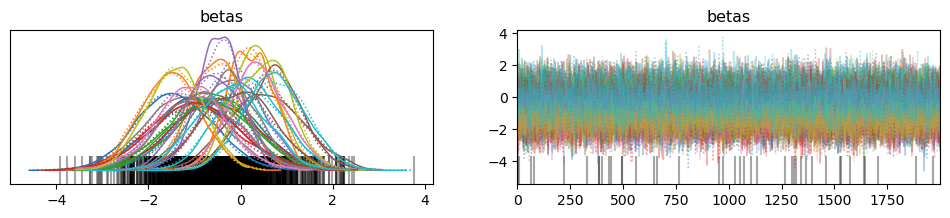

In [8]:
#Provide inference with Bayesian posterior analysis and report MCMC diagnostics

az.plot_trace(trace,var_names='betas');

In [9]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.511,0.892,-2.166,1.169,0.012,0.015,5174.0,2935.0,1.0
betas[1],-0.497,0.571,-1.550,0.556,0.009,0.008,4426.0,3174.0,1.0
betas[2],-0.501,0.880,-2.198,1.122,0.012,0.015,5371.0,2740.0,1.0
betas[3],-0.592,0.923,-2.288,1.172,0.012,0.016,5542.0,2750.0,1.0
betas[4],-0.167,0.656,-1.392,1.093,0.010,0.010,4294.0,2965.0,1.0
betas[5],0.545,0.800,-0.933,2.054,0.012,0.013,4533.0,2718.0,1.0
betas[6],-0.885,0.832,-2.419,0.657,0.012,0.014,4706.0,2829.0,1.0
betas[7],-1.232,0.848,-2.858,0.349,0.012,0.014,4992.0,2587.0,1.0
betas[8],0.308,0.533,-0.698,1.286,0.008,0.008,4785.0,3098.0,1.0
betas[9],0.190,0.716,-1.134,1.561,0.011,0.012,4576.0,2862.0,1.0


r_hat is equal to 1, meaning that all chains are sampling from the same underlying distribution. Also 0 is within the 95% confidence intervals of all but 1 parameter.

# Q2

In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data (n samples, p predictors, m outcomes)
np.random.seed(42)
n, p, m = 200, 3, 2  
X = np.random.randn(n, p)  
true_betas = np.random.randn(p, m)  
y = X @ true_betas + np.random.randn(n, m) * 0.5 

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
import pymc as pm
import numpy as np
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
n, p, m = 200, 3, 2  # 200 samples, 3 predictors, 2 response variables
X = np.random.randn(n, p)  # Predictor variables
true_betas = np.random.randn(p, m)  # True regression coefficients
y = X @ true_betas + np.random.randn(n, m) * 0.5  # Add Gaussian noise

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Bayesian Multivariate Regression Model
with pm.Model() as multivariate_regression:
    # Priors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))  # Coefficients
    intercept = pm.Normal("intercept", mu=0, sigma=1, shape=(m,))  # Intercept term
    
    # Covariance matrix prior
    sd_dist = pm.HalfCauchy.dist(2.5)  # Prior on standard deviations
    L_raw = pm.LKJCholeskyCov("L_raw", n=m, eta=2, sd_dist=sd_dist)  # Raw Cholesky factor
    Σ = pm.Deterministic("Σ", L_raw @ L_raw.T)  # Compute full covariance matrix

    # Linear model
    mu = X_train @ betas + intercept  # (n, m) shape

    # Likelihood (Multivariate Normal with full covariance)
    y_obs = pm.MvNormal("y", mu=mu, cov=Σ, observed=y_train)

    # MCMC Sampling
    trace = pm.sample(2000, tune=1000, cores=2, return_inferencedata=True)

# Posterior analysis
az.summary(trace)
az.plot_trace(trace)


AttributeError: 'tuple' object has no attribute 'T'

In [6]:
import pymc as pm
import numpy as np
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
n, p, m = 200, 3, 2  # 200 samples, 3 predictors, 2 response variables
X = np.random.randn(n, p)  # Predictor variables
true_betas = np.random.randn(p, m)  # True regression coefficients
y = X @ true_betas + np.random.randn(n, m) * 0.5  # Add Gaussian noise

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Bayesian Multivariate Regression Model
with pm.Model() as multivariate_regression:
    # Priors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))  # Coefficients
    intercept = pm.Normal("intercept", mu=0, sigma=1, shape=(m,))  # Intercept term
    
    # Covariance matrix prior
    sd_dist = pm.HalfCauchy.dist(2.5)  # Prior on standard deviations
    L_raw, _ = pm.LKJCholeskyCov("L_raw", n=m, eta=2, sd_dist=sd_dist, compute_corr=True)  # Unpack correctly
    Σ = pm.Deterministic("Σ", L_raw @ L_raw.T)  # Compute full covariance matrix

    # Linear model
    mu = X_train @ betas + intercept  # (n, m) shape

    # Likelihood (Multivariate Normal with full covariance)
    y_obs = pm.MvNormal("y", mu=mu, cov=Σ, observed=y_train)

    # MCMC Sampling
    trace = pm.sample(2000, tune=1000, cores=2, return_inferencedata=True)

# Posterior analysis
az.summary(trace)
az.plot_trace(trace)


ValueError: too many values to unpack (expected 2)

# Q3

In [1]:
import pymc as pm
import numpy as np
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simulate data
np.random.seed(42)
n, p, m = 200, 3, 2  
X = np.random.randn(n, p) 
true_betas = np.random.randn(p, m)  
z_true = X @ true_betas + np.random.randn(n, m) * 0.5 
y = (z_true > 0).astype(int)  

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Bayesian Model
with pm.Model() as bayesian_multivariate_classification:
   
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))
    intercept = pm.Normal("intercept", mu=0, sigma=1, shape=(m,))
    
    sd_dist = pm.HalfCauchy.dist(2.5)
    L_raw, _ = pm.LKJCholeskyCov("L_raw", n=m, eta=2, sd_dist=sd_dist, compute_corr=True)
    Σ = pm.Deterministic("Σ", L_raw @ L_raw.T)

    z = pm.MvNormal("z", mu=X_train @ betas + intercept, chol=L_raw, shape=(n, m))
    
    p_y = pm.math.invprobit(z)
    
    y_obs = pm.Bernoulli("y", p=p_y, observed=y_train)

    trace = pm.sample(2000, tune=1000, cores=2, return_inferencedata=True)

# Posterior analysis
az.summary(trace)
az.plot_trace(trace)


ValueError: too many values to unpack (expected 2)